In [1]:
import pylab as plt
import multiprocessing as mp
from train import train, epochs

d:\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' 

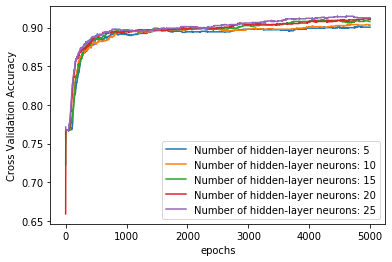

In [2]:
def main():
    params = []
    param1 = {}
    param1['weight_decay_parameter'] = 1e-6
    param1['batch_size'] = 64 #temp
    param1['hidden_layer_neuron_num'] = 5
    param1['required'] = 'cross-validation accuracy'
    param1['hidden_layer_num'] = 1
    param2 = param1.copy()
    param3 = param1.copy()
    param4 = param1.copy()
    param5 = param1.copy()
    
    params.append(param1)
    param2['hidden_layer_neuron_num'] = 10
    params.append(param2)
    param3['hidden_layer_neuron_num'] = 15
    params.append(param3)
    param4['hidden_layer_neuron_num'] = 20
    params.append(param4)
    param5['hidden_layer_neuron_num'] = 25
    params.append(param5)
    no_threads = mp.cpu_count()
    p = mp.Pool(processes=no_threads)
    accs = p.map(train, params)
    plt.figure()
    for i in range(len(params)):
        plt.plot(range(epochs), accs[i][0], label='Number of hidden-layer neurons: '
                 + str(params[i]['hidden_layer_neuron_num']))
    plt.xlabel('epochs')
    plt.ylabel('Cross Validation Accuracy')
    plt.legend()
    plt.show()
    
    
if __name__ == '__main__':
    main()